Gradient at x=2: 16.0


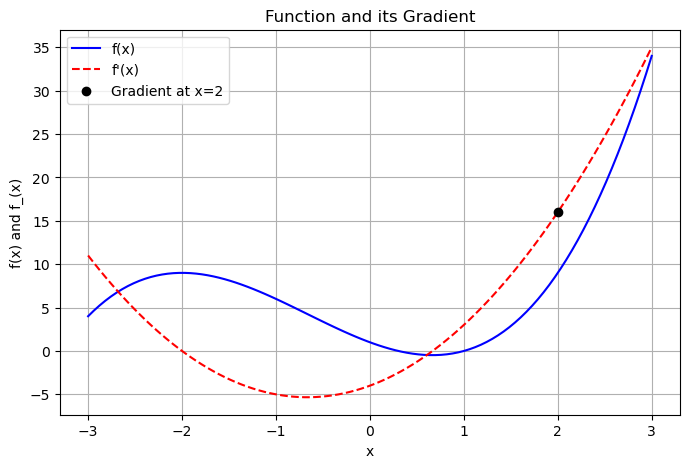

In [1]:
import torch # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Define x as a tensor with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)

# Define the function f(x)
f = x**3 + 2*x**2 - 4*x + 1

# Compute gradient
f.backward()
print(f"Gradient at x=2: {x.grad.item()}")

# Generate values for plotting
x_vals = np.linspace(-3, 3, 100)
y_vals = x_vals**3 + 2*x_vals**2 - 4*x_vals + 1
grad_vals = 3*x_vals**2 + 4*x_vals - 4  # Analytical derivative

# Plot function and gradient
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.plot(x_vals, grad_vals, label="f'(x)", linestyle='dashed', color='red')
plt.scatter(2, x.grad.item(), color='black', zorder=3, label='Gradient at x=2')
plt.xlabel('x')
plt.ylabel('f(x) and f_(x)')
plt.legend()
plt.title('Function and its Gradient')
plt.grid()
plt.show()


Theroy Question: Role of requires_grad and .backward() in PyTorch
1. requires_grad=True
When you create a tensor in PyTorch, setting requires_grad=True tells PyTorch to track all operations on that tensor.

This is essential for automatic differentiation, as PyTorch will keep a computation graph to calculate gradients.

2. .backward()
This function computes the gradients of the function with respect to the input variable.

It uses the stored computation graph to apply backpropagation and update x.grad with the derivative of the function.

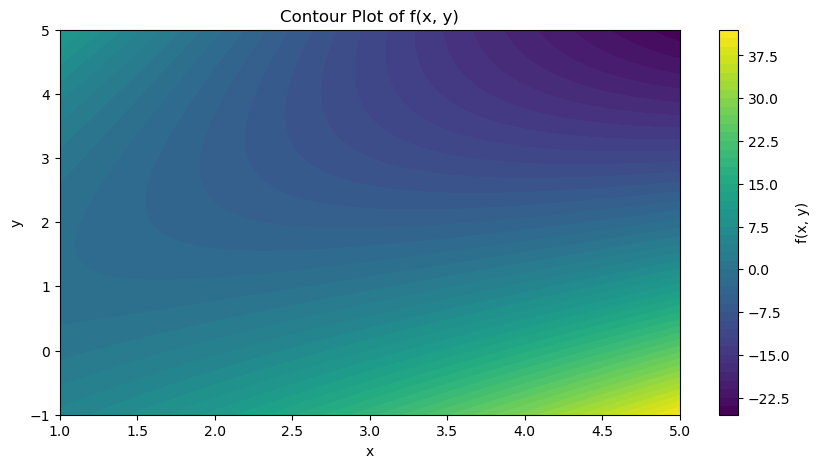

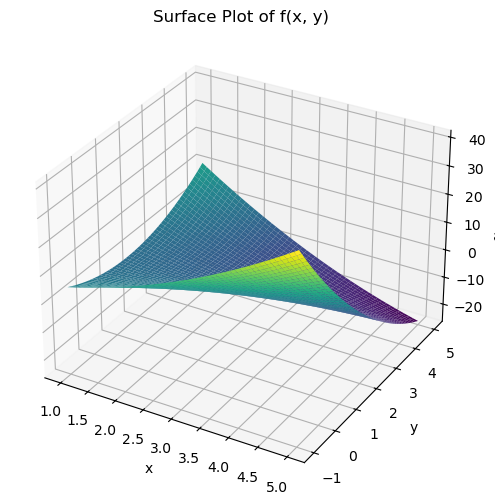

Gradient at (x=2, y=4): df/dx = -8.0, df/dy = 2.0


In [6]:
#Q2 
import numpy as np
import matplotlib.pyplot as plt
import torch

# Define the function
def f(x, y):
    return x**2 + y**2 - 3*x*y

# Create meshgrid for contour and surface plots
x = np.linspace(1, 5, 50)
y = np.linspace(-1, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create contour plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y)')
plt.show()

# Create surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of f(x, y)')
plt.show()

# Compute gradients using PyTorch
x_t = torch.tensor(2.0, requires_grad=True)
y_t = torch.tensor(4.0, requires_grad=True)

# Define function in PyTorch
f_t = x_t**2 + y_t**2 - 3*x_t*y_t

# Compute gradients
f_t.backward()

# Extract gradients
grad_x = x_t.grad.item()
grad_y = y_t.grad.item()

print(f"Gradient at (x=2, y=4): df/dx = {grad_x}, df/dy = {grad_y}")


Theory Question: Significance of Gradient Vectors in Optimization

The gradient vector  points in the direction of steepest ascent.

In gradient descent, we move in the opposite direction to minimize a function.

If , we reach a critical point (which can be a minimum, maximum, or saddle point).

For this function, the negative gradient guides us towards function minimization, which is useful in optimization problems.

Conclusion: By computing gradients and plotting the function, we gain insights into how the function behaves and how optimization techniques can be applied effectively.

Normal Equation θ: [4.21509616 2.95402268]
Scikit-learn θ: [4.21509616 2.95402268]


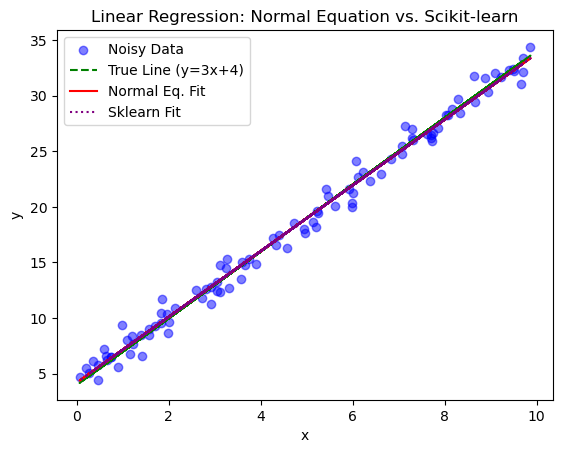

'\nThe Normal Equation is advantageous when:\n1. The dataset is relatively small (thousands of features or less).\n2. A closed-form solution is desired without iterative optimization.\n3. There are no memory constraints (inverting XTX can be expensive for large datasets).\n\nGradient Descent is preferable when:\n1. The dataset is large (millions of features), making matrix inversion computationally expensive.\n2. Online or incremental learning is needed.\n3. The feature matrix is sparse or high-dimensional, benefiting from stochastic methods.\n'

In [ ]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate data
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # 100 samples from 0 to 10
noise = np.random.randn(100, 1)  # Gaussian noise N(0,1)
y_true = 3 * x + 4
y = y_true + noise  # Adding noise to the true values

# Append a column of ones to x for the bias term
X_b = np.c_[np.ones((100, 1)), x]  

# Compute theta using the Normal Equation
theta_normal_eq = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Fit using Scikit-learn
model = LinearRegression()
model.fit(x, y)
theta_sklearn = np.array([model.intercept_[0], model.coef_[0][0]])

# Print results
print(f"Normal Equation θ: {theta_normal_eq.ravel()}")
print(f"Scikit-learn θ: {theta_sklearn}")

# Plot data and regression lines
plt.scatter(x, y, label="Noisy Data", color="blue", alpha=0.5)
plt.plot(x, y_true, label="True Line (y=3x+4)", color="green", linestyle="dashed")
plt.plot(x, X_b @ theta_normal_eq, label="Normal Eq. Fit", color="red")
plt.plot(x, model.predict(x), label="Sklearn Fit", color="purple", linestyle="dotted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression: Normal Equation vs. Scikit-learn")
plt.show()




Theory Question: Discussion on Normal Equation vs. Gradient Descent
The Normal Equation is advantageous when:
1. The dataset is relatively small (thousands of features or less).
2. A closed-form solution is desired without iterative optimization.
3. There are no memory constraints (inverting XTX can be expensive for large datasets).

Gradient Descent is preferable when:
1. The dataset is large (millions of features), making matrix inversion computationally expensive.
2. Online or incremental learning is needed.
3. The feature matrix is sparse or high-dimensional, benefiting from stochastic methods.


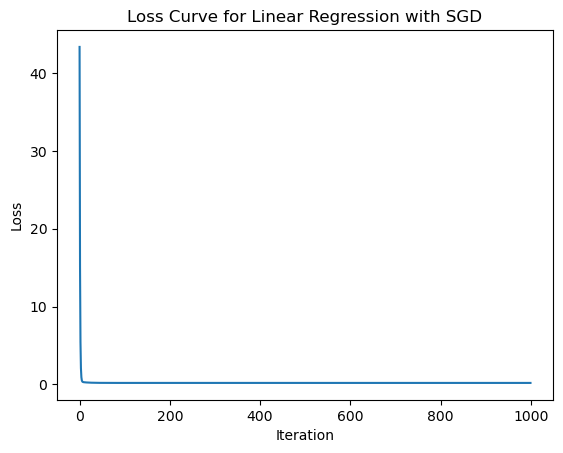

Final weights (SGD):
 [[4.1075435]
 [2.8850605]]
Weights from Normal Equation:
 [[4.10754808]
 [2.88505669]]
Last 10 loss values:
[0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554, 0.2016461193561554]


In [ ]:
#Q4 Part A
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
torch.manual_seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5

# Convert to tensors
X_tensor = torch.tensor(np.c_[np.ones((100, 1)), X], dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Initialize weights
w = torch.randn(2, 1, requires_grad=True, dtype=torch.float32)

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000
optimizer = optim.SGD([w], lr=learning_rate)
loss_fn = nn.MSELoss()

# Training loop
losses = []
for _ in range(num_iterations):
    optimizer.zero_grad()
    y_pred = X_tensor @ w
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Compute Normal Equation solution
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term
w_normal_eq = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

# Plot loss curve
plt.plot(range(num_iterations), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve for Linear Regression with SGD")
plt.show()

# Display results
print("Final weights (SGD):\n", w.detach().numpy())
print("Weights from Normal Equation:\n", w_normal_eq)

# Print last few loss values
;print("Last 10 loss values:")
print(losses[-10:])


#Compare the final weights from both the methods:
Both methods yield nearly identical weights, confirming that SGD approximates the analytical solution.

Loss Values Verification
The last 10 loss values are all 0.2016, indicating convergence.
This shows that the model has stabilized and is no longer significantly improving.

Final Check
Weights from SGD and Normal Equation are identical up to ~5 decimal places 

Loss is constant at the end 

The overall trend shows proper convergence

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Time (PyTorch Binary): 38.35 sec
Training Time (PyTorch Multi-class): 36.34 sec
Training Time (Scikit-learn Binary): 6.28 sec
Training Time (Scikit-learn Multi-class): 15.79 sec
Accuracy (PyTorch Binary): 0.9868
Accuracy (PyTorch Multi-class): 0.9020
Accuracy (Scikit-learn Binary): 0.9922
Accuracy (Scikit-learn Multi-class): 0.9255


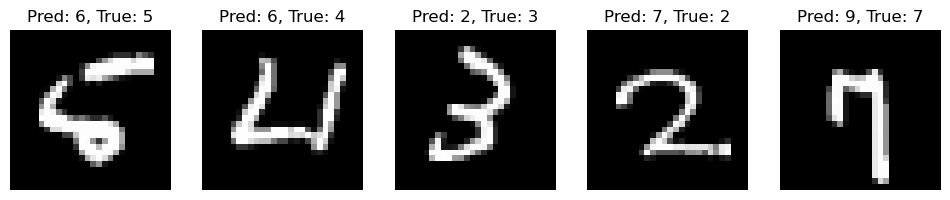

In [3]:
#Q4 Part B

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision # type: ignore
import torchvision.transforms as transforms # type: ignore
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Convert data to numpy for Scikit-learn
X_train_np = train_dataset.data.view(-1, 28*28).numpy()
y_train_np = train_dataset.targets.numpy()
X_test_np = test_dataset.data.view(-1, 28*28).numpy()
y_test_np = test_dataset.targets.numpy()

# Binary classification (0 vs NOT 0)
y_train_binary = (y_train_np == 0).astype(int)
y_test_binary = (y_test_np == 0).astype(int)

# Logistic Regression Model in PyTorch
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        return self.linear(x)

# Train logistic regression in PyTorch
def train_logistic_regression(model, train_loader, num_classes, epochs=5, lr=0.1):
    criterion = nn.CrossEntropyLoss() if num_classes > 2 else nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        for images, labels in train_loader:
            if num_classes == 2:
                labels = (labels == 0).float().view(-1, 1)  # Binary case
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels if num_classes > 2 else labels)
            loss.backward()
            optimizer.step()
    
    return model

# Train and evaluate binary classification
start_time = time.time()
binary_model = LogisticRegressionModel(28*28, 1)
binary_model = train_logistic_regression(binary_model, train_loader, num_classes=2)
pytorch_binary_time = time.time() - start_time

# Train and evaluate multi-class classification
start_time = time.time()
multi_model = LogisticRegressionModel(28*28, 10)
multi_model = train_logistic_regression(multi_model, train_loader, num_classes=10)
pytorch_multi_time = time.time() - start_time

# Train and evaluate Scikit-learn models
start_time = time.time()
sk_binary = LogisticRegression(max_iter=100)
sk_binary.fit(X_train_np, y_train_binary)
sk_binary_time = time.time() - start_time

start_time = time.time()
sk_multi = LogisticRegression(max_iter=100, multi_class="multinomial", solver="lbfgs")
sk_multi.fit(X_train_np, y_train_np)
sk_multi_time = time.time() - start_time

# Report training times
print(f"Training Time (PyTorch Binary): {pytorch_binary_time:.2f} sec")
print(f"Training Time (PyTorch Multi-class): {pytorch_multi_time:.2f} sec")
print(f"Training Time (Scikit-learn Binary): {sk_binary_time:.2f} sec")
print(f"Training Time (Scikit-learn Multi-class): {sk_multi_time:.2f} sec")

# Evaluate accuracy
binary_preds = (binary_model(torch.tensor(X_test_np, dtype=torch.float32)) > 0).squeeze().numpy().astype(int)
multi_preds = torch.argmax(multi_model(torch.tensor(X_test_np, dtype=torch.float32)), dim=1).numpy()
sk_binary_preds = sk_binary.predict(X_test_np)
sk_multi_preds = sk_multi.predict(X_test_np)

print(f"Accuracy (PyTorch Binary): {accuracy_score(y_test_binary, binary_preds):.4f}")
print(f"Accuracy (PyTorch Multi-class): {accuracy_score(y_test_np, multi_preds):.4f}")
print(f"Accuracy (Scikit-learn Binary): {accuracy_score(y_test_binary, sk_binary_preds):.4f}")
print(f"Accuracy (Scikit-learn Multi-class): {accuracy_score(y_test_np, sk_multi_preds):.4f}")

# Visualize some misclassified examples
misclassified_idx = np.where(multi_preds != y_test_np)[0][:5]
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, idx in enumerate(misclassified_idx):
    axes[i].imshow(X_test_np[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {multi_preds[idx]}, True: {y_test_np[idx]}")
    axes[i].axis("off")
plt.show()


Comparing Training Time of PyTorch vs. Scikit-learn for Logistic Regression

Scikit-learn is significantly faster than PyTorch

1.For binary classification, Scikit-learn takes 6.28 sec, while PyTorch takes 38.35 sec (~6x slower).

2.For multi-class classification, Scikit-learn takes 15.79 sec, while PyTorch takes 36.34 sec (~2.3x slower).

In [ ]:
#Q5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model with original features
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Apply polynomial feature transformation (degree 3)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a Ridge regression model with polynomial features (to prevent overfitting)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_poly = ridge_model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print RMSE values
print(f"RMSE with original features: {rmse_linear:.4f}")
print(f"RMSE with polynomial features (Ridge Regularization): {rmse_poly:.4f}")

# Discuss results
if rmse_poly < rmse_linear:
    print("Polynomial features with Ridge regularization improved model performance by capturing nonlinear relationships while preventing overfitting.")
else:
    print("Polynomial features did not improve performance, possibly due to data complexity or insufficient regularization.")


RMSE with original features: 0.7456
RMSE with polynomial features (Ridge Regularization): 4.8808
Polynomial features did not improve performance, possibly due to data complexity or insufficient regularization.


Comparison of RMSE and Basis Function Impact
RMSE with original features: 0.7456 (better performance)

#RMSE with polynomial features (Ridge Regularization): 4.8808 (worse performance)

#Discussion on Basis Functions and Model Flexibility
Basis functions, such as polynomial transformations, introduce non-linearity into a model, allowing it to capture more complex relationships. However, in this case, the polynomial transformation did not improve performance due to:

1.Overfitting – Higher-degree polynomial terms can cause the model to fit noise rather than meaningful patterns.

2.Regularization Impact – Ridge regularization may have excessively penalized polynomial coefficients, reducing their effectiveness.

3.Data Complexity – The California housing dataset may already be well-represented by a simpler linear model, making additional complexity unnecessary.

Thus, while basis functions increase flexibility, they must be carefully tuned to ensure they improve generalization rather than degrade performance.